

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Note: The functions used here are created by me. If you use them don't forget to give credit to me. I have spent alot of time building them.</h1>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Introduction </h1></div>



![](https://previews.123rf.com/images/bearsky23/bearsky231808/bearsky23180800221/107269561-insurance-web-header-banner-that-covers-homeowners-medical-life-vehicle-insurance.jpg)
#### [Image Source](https://previews.123rf.com/images/bearsky23/bearsky231808/bearsky23180800221/107269561-insurance-web-header-banner-that-covers-homeowners-medical-life-vehicle-insurance.jpg)

![facts](https://i.pinimg.com/originals/c2/fc/44/c2fc441ff047a90a5e8052b794888de5.jpg)


#### [Image Source](https://i.pinimg.com/originals/c2/fc/44/c2fc441ff047a90a5e8052b794888de5.jpg)

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<p style="text-align:center;"> It's important to have health insurance as a safety net. If you unexpectedly get sick or injured, health insurance is there to help cover costs that you likely can't afford to pay on your own. Health care can be very expensive. It can be an enormous financial burden. </p>
</div>



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Libraries </h1>
</div>


In [ ]:
# pip install lucifer-ml

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

## Importing LuciferML
from luciferml.supervised import classification as cls 
from luciferml.preprocessing import Preprocess as prep

import warnings
warnings.simplefilter(action='ignore', category=Warning)


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Dataset </h1>
</div>


In [3]:
dataset = pd.read_csv('train.csv')


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Exploratory Data Analysis </h1>
</div>


In [4]:
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
dataset.shape

(381109, 12)

In [6]:
dataset.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,381109.000000,190555.000000,110016.836208,1.000000,95278.000000,190555.000000,285832.000000,381109.000000
Age,381109.000000,38.822584,15.511611,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,381109.000000,0.997869,0.046110,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,381109.000000,26.388807,13.229888,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,381109.000000,0.458210,0.498251,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,381109.000000,30564.389581,17213.155057,2630.000000,24405.000000,31669.000000,39400.000000,540165.000000
Policy_Sales_Channel,381109.000000,112.034295,54.203995,1.000000,29.000000,133.000000,152.000000,163.000000
Vintage,381109.000000,154.347397,83.671304,10.000000,82.000000,154.000000,227.000000,299.000000
Response,381109.000000,0.122563,0.327936,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
dataset.isnull().values.any()

False



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Countplot for Response</h2>
</div>


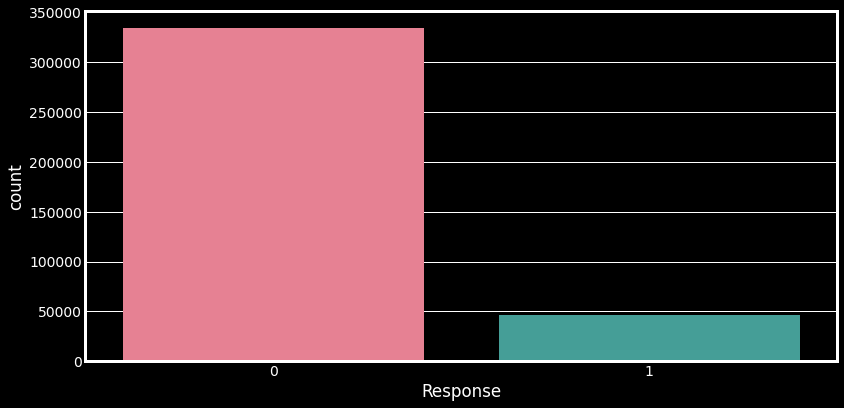

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Response", data=dataset, palette='husl');



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Splitting Columns into Categorical and Quantitative Data</h2>
</div>


In [10]:
categorical_cols =['Gender','Vehicle_Damage']

In [11]:
quant_cols = [ 'Age', 'Region_Code',
        
       'Policy_Sales_Channel', 'Vintage']


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Some Box Plots</h2>
</div>


Your Charts are being ready:   0%|          | 0/4 [00:00<?, ?it/s]

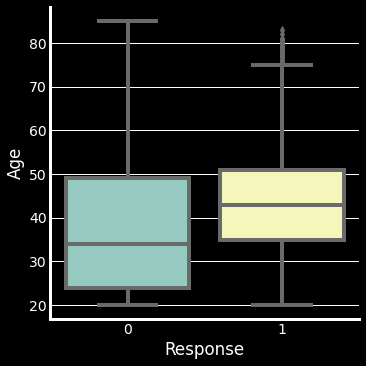

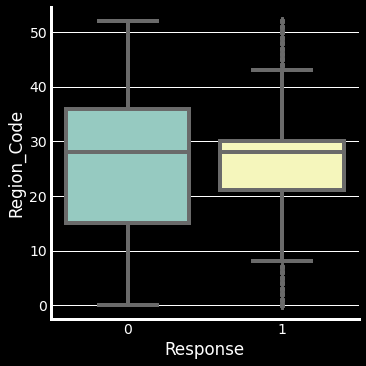

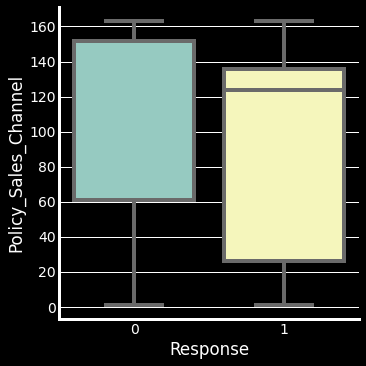

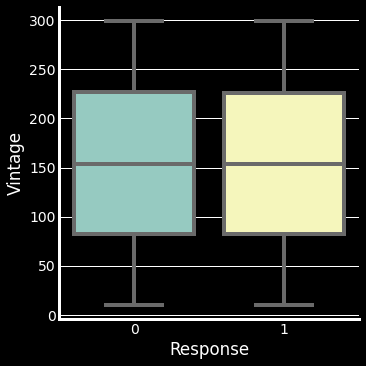

In [12]:
def boxPlotter(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="Response", y=columnName, data=dataset, kind="box");
for column in tqdm_notebook(quant_cols, desc = "Your Charts are being ready"):
    boxPlotter(dataset, column)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pie Chart</h2>
</div>



In [13]:
def pieChartPlotter(dataset, columnName):
    """
    Creates pie chart of the column given as parameter in the dataset
    """
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

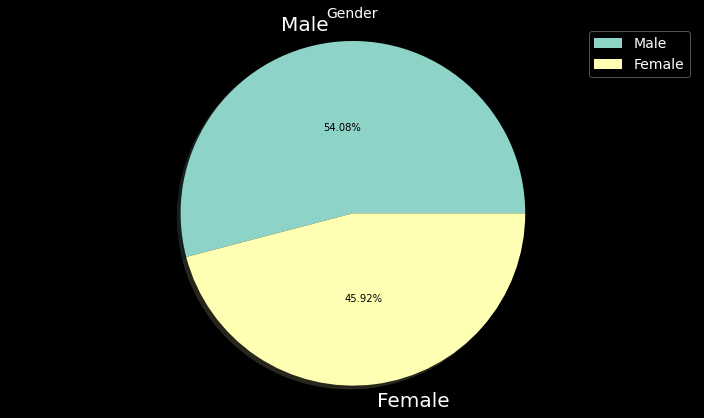

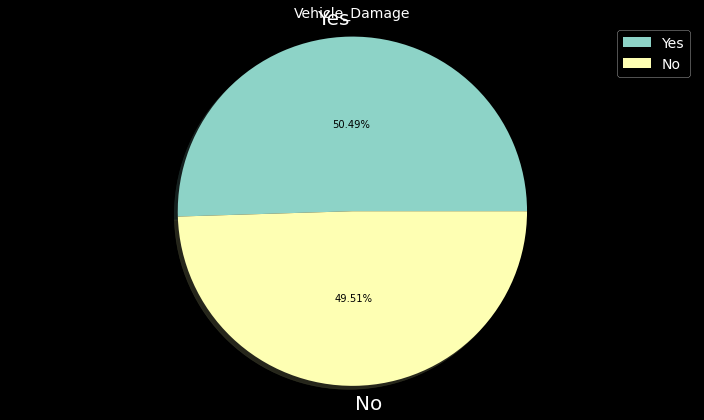

In [14]:
for column in categorical_cols:
    pieChartPlotter(dataset, column) 



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Correlation Plot</h2>
</div>

In [15]:
corr_data = dataset.drop(['id'],axis = 1)

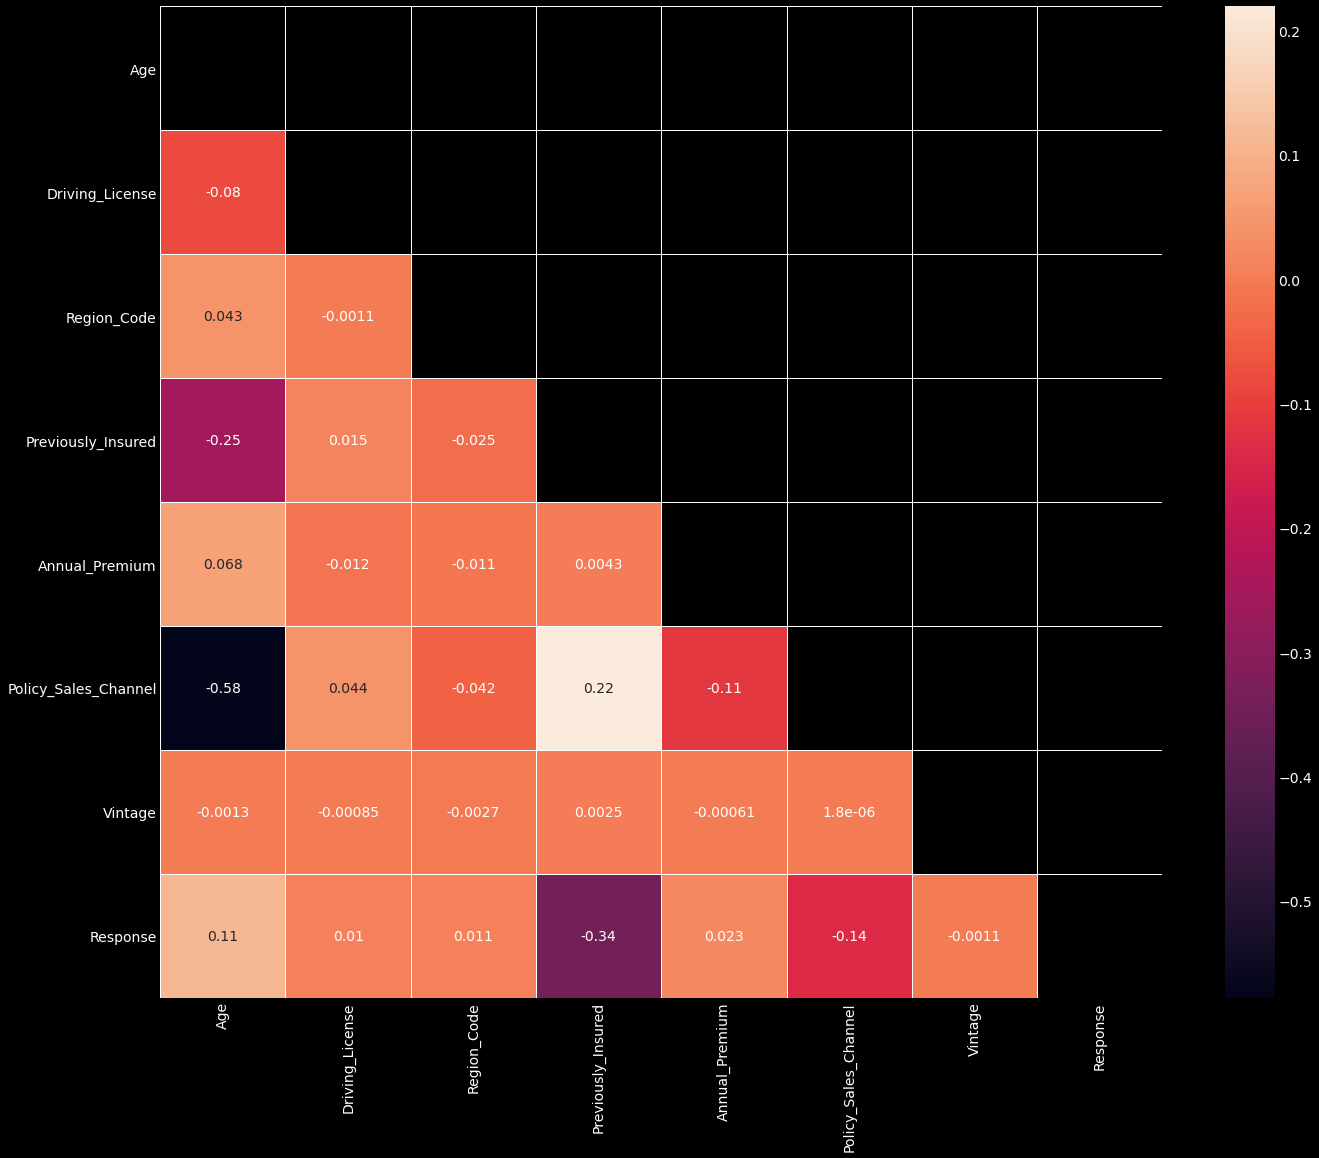

In [16]:
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Some Distribution Plots</h2>
</div>


In [17]:
def distributionPlot(dataset):
    """ 
    Creates distribution plot.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(dataset.columns)), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(dataset.columns)/3), 3, i+1)
        sns.distplot(
            dataset.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

In [18]:
plot_data = dataset.drop(['id', 'Response','Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)

Your plots are being ready:   0%|          | 0/3 [00:00<?, ?it/s]

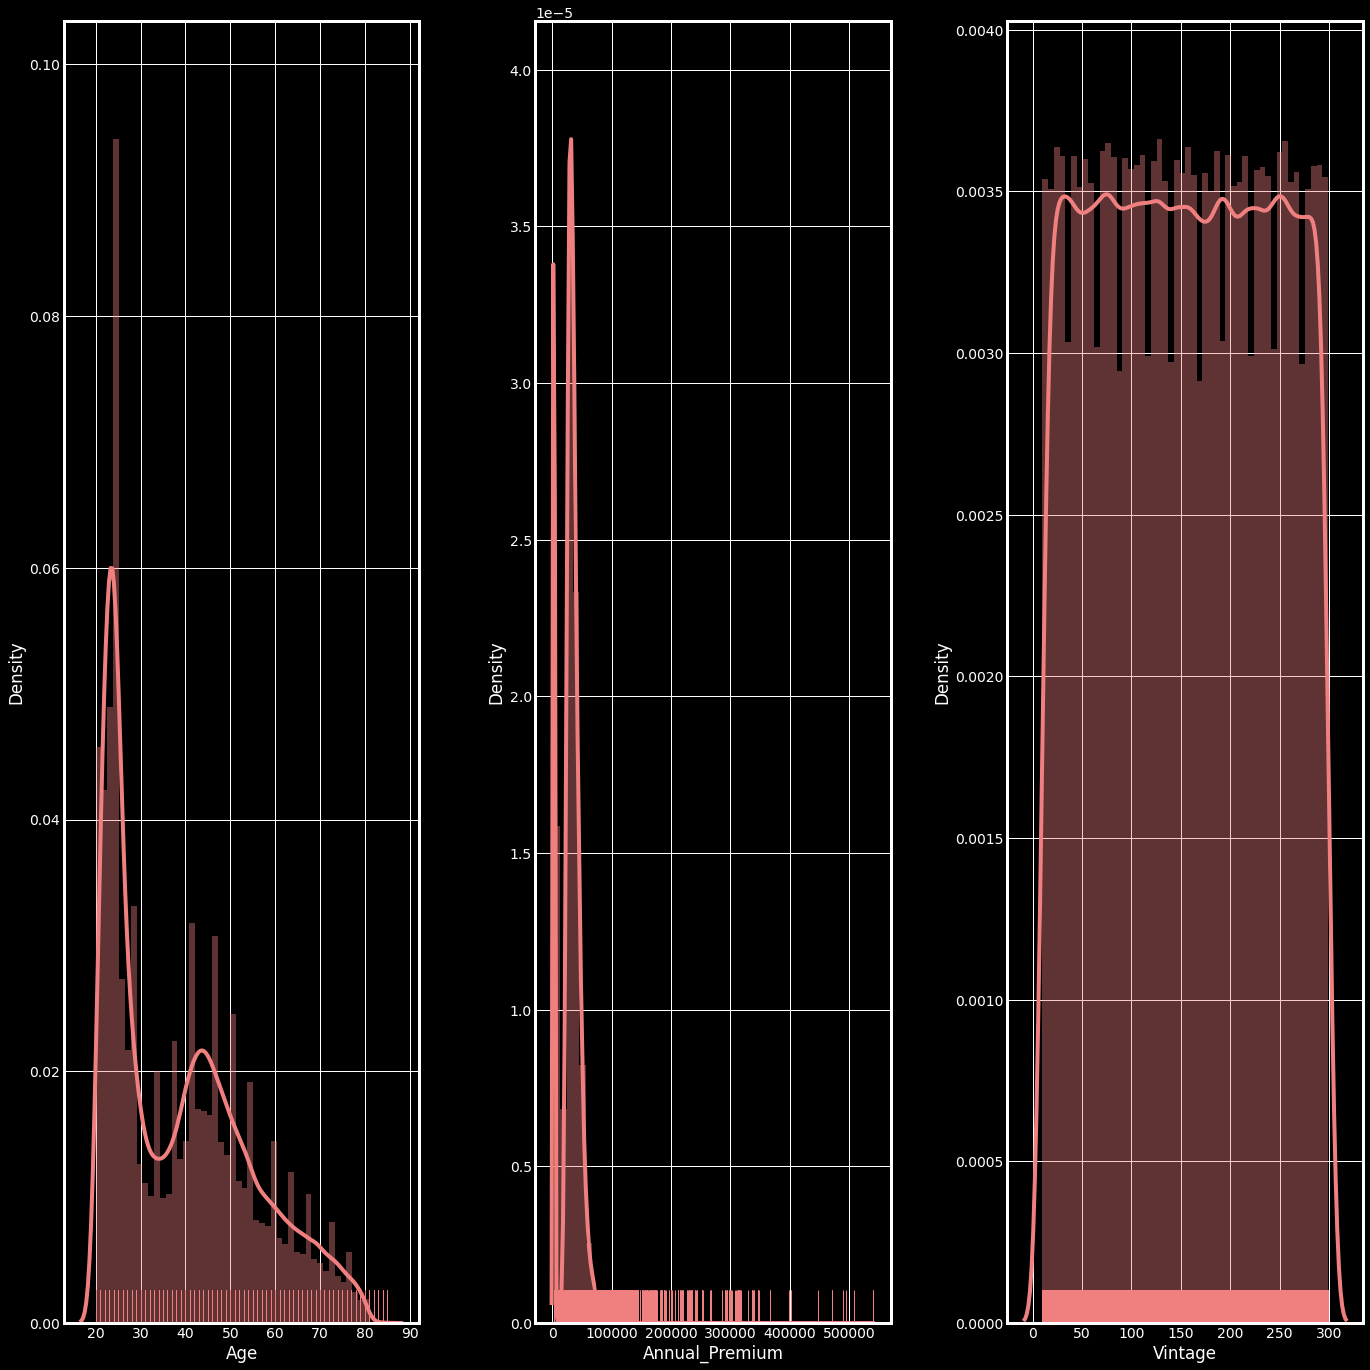

In [19]:
distributionPlot(plot_data)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pairplots</h2>
</div>



In [20]:
pp_plot_data = dataset.drop(['id','Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)

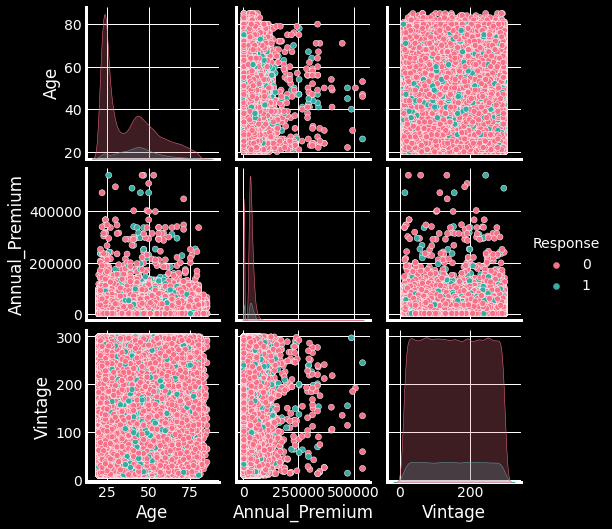

In [21]:
sns.pairplot(pp_plot_data, hue="Response", palette="husl");

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h4 style="text-align:left;">From above charts we can confirm</h4>
<p style="text-align:left;">1) There seems to be significant  correlation between all the features.
    <br>
2) Some columns are skewed. So, lets correct it</p>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight:bold">Data Preprocessing</h1>
</div>



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Skewness Correction</h2>
</div>

Started Corrector 


Skewness in numerical features: 

                       Skewness
Annual_Premium         1.766080
Age                    0.672536
Previously_Insured     0.167746
Vintage                0.003030
Region_Code           -0.115266
Policy_Sales_Channel  -0.900005
Driving_License      -21.595097
Skewness Before Transformation for Annual_Premium:  1.7660872148961309 

Mean before Transformation for Annual_premium : 30564.389581458323, Standard Deviation before Transformation for Annual_premium : 17213.132473983726 



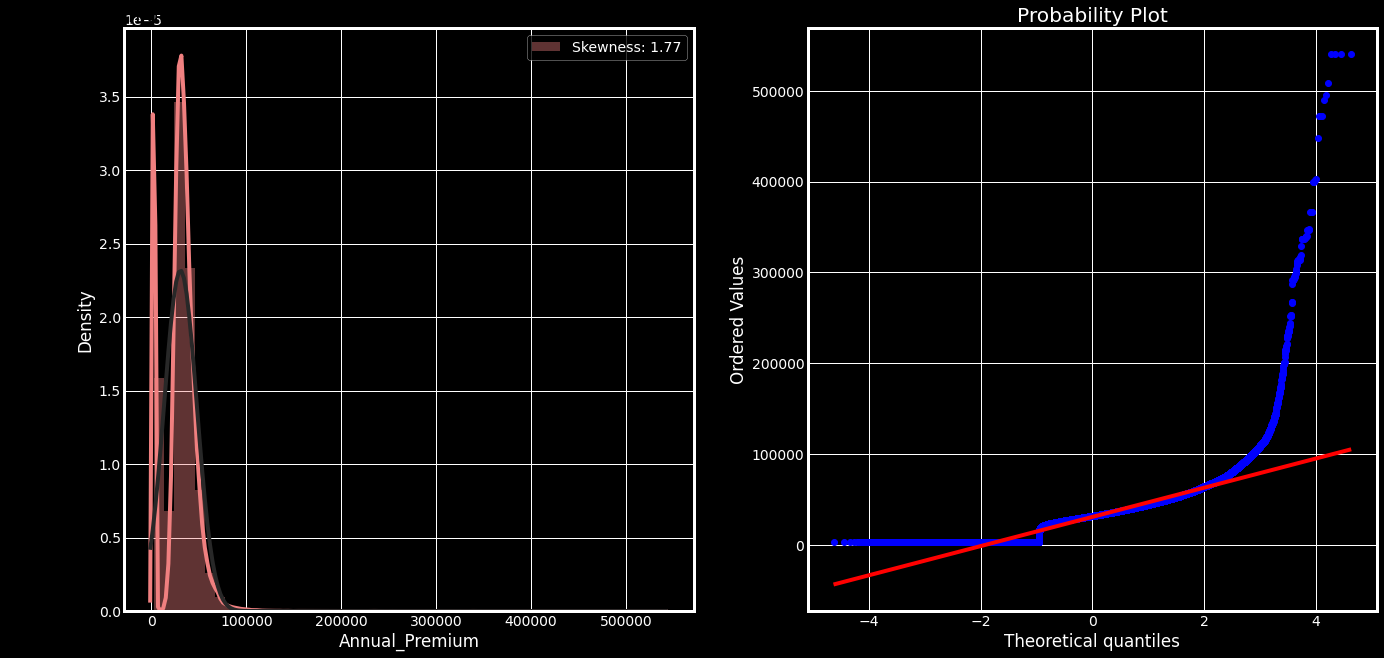

Skewness After Transformation for Annual_Premium:  -1.3377192621854284 

Mean before Transformation for Annual_premium : 23.59489504043062, Standard Deviation before Transformation for Annual_premium : 4.078229345694024 



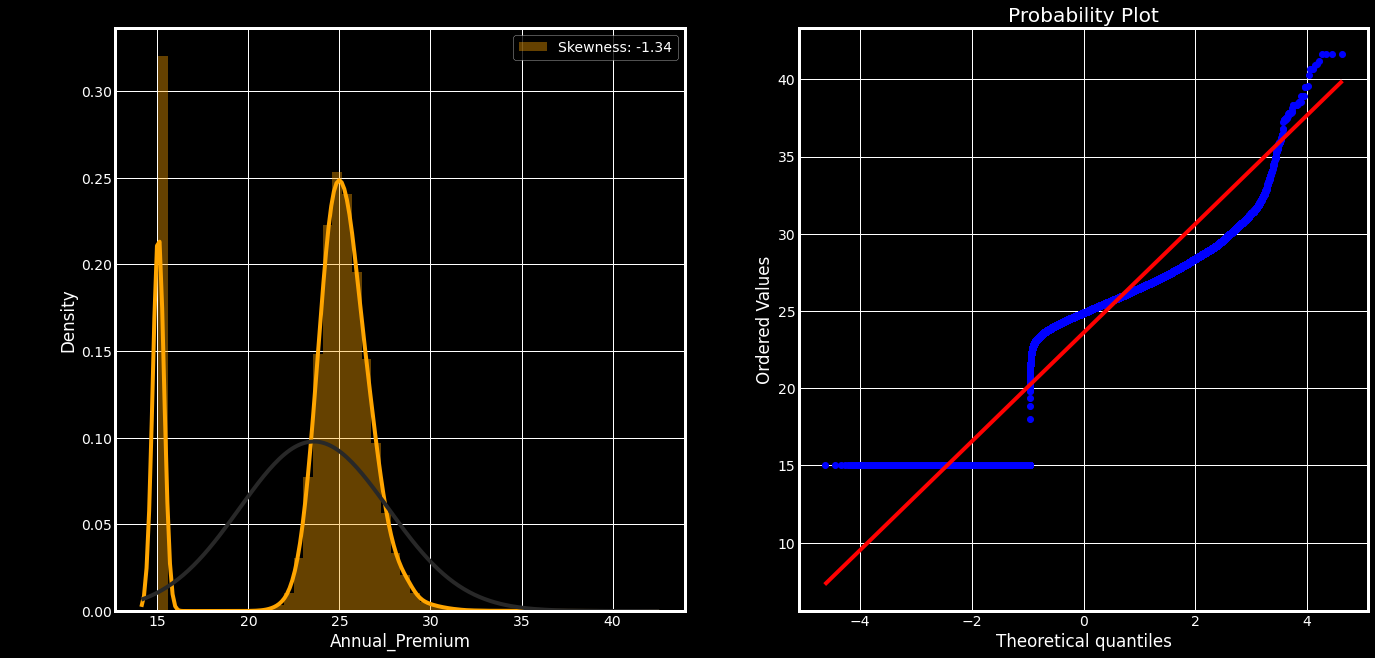

Skewness Before Transformation for Age:  0.6725389977260843 

Mean before Transformation for Age : 38.822583565331705, Standard Deviation before Transformation for Age : 15.511590667459156 



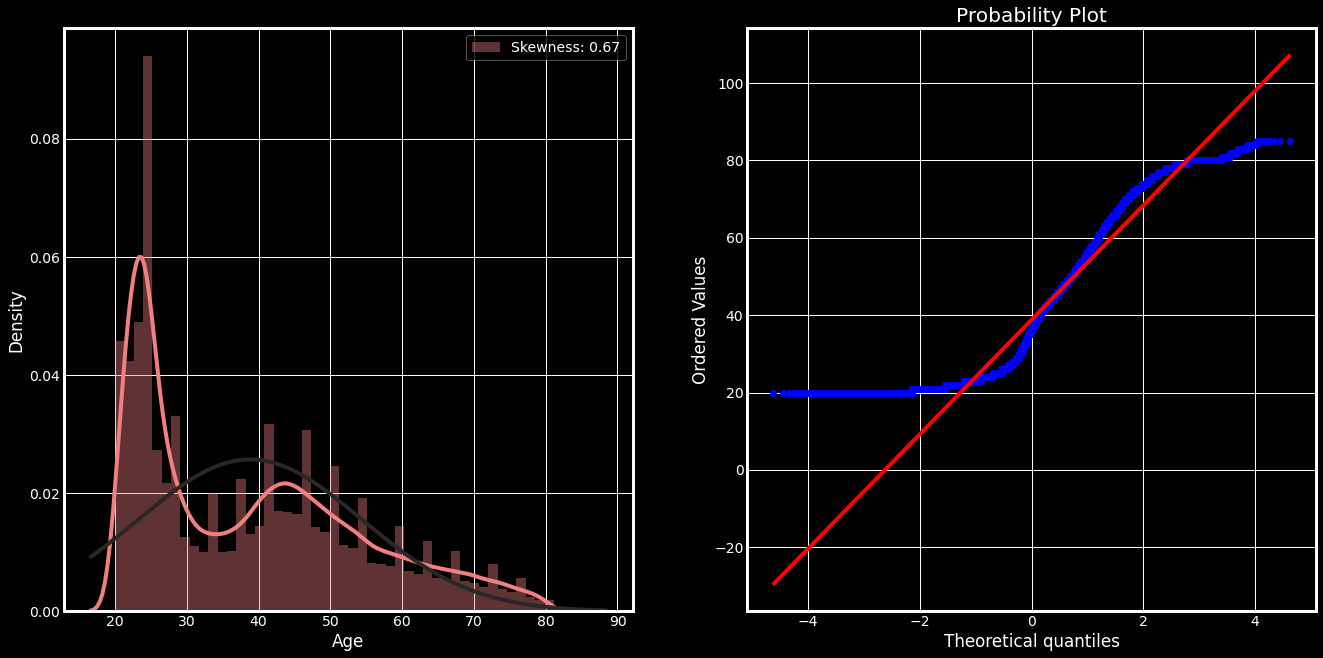

Skewness After Transformation for Age:  0.21519459748016914 

Mean before Transformation for Age : 3.611251950696527, Standard Deviation before Transformation for Age : 0.3803312296233302 



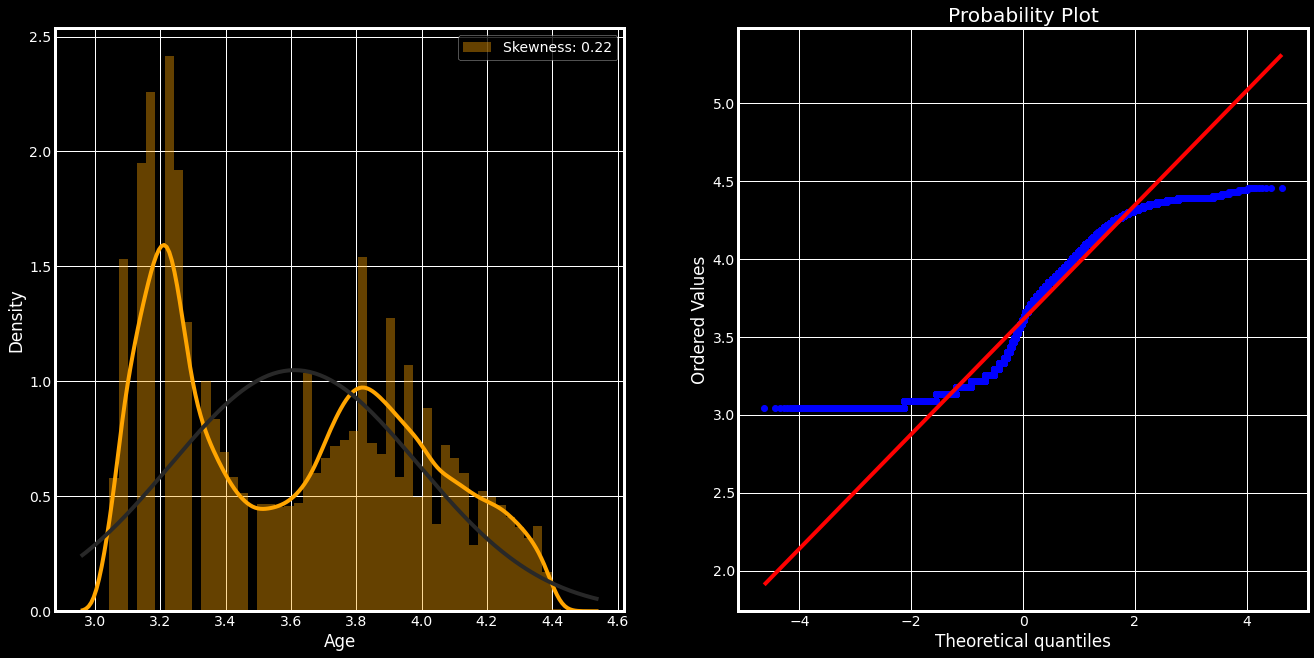

Skewness Before Transformation for Previously_Insured:  0.1677471164589759 

Mean before Transformation for Previously_insured : 0.4582101183650871, Standard Deviation before Transformation for Previously_insured : 0.4982505452008456 



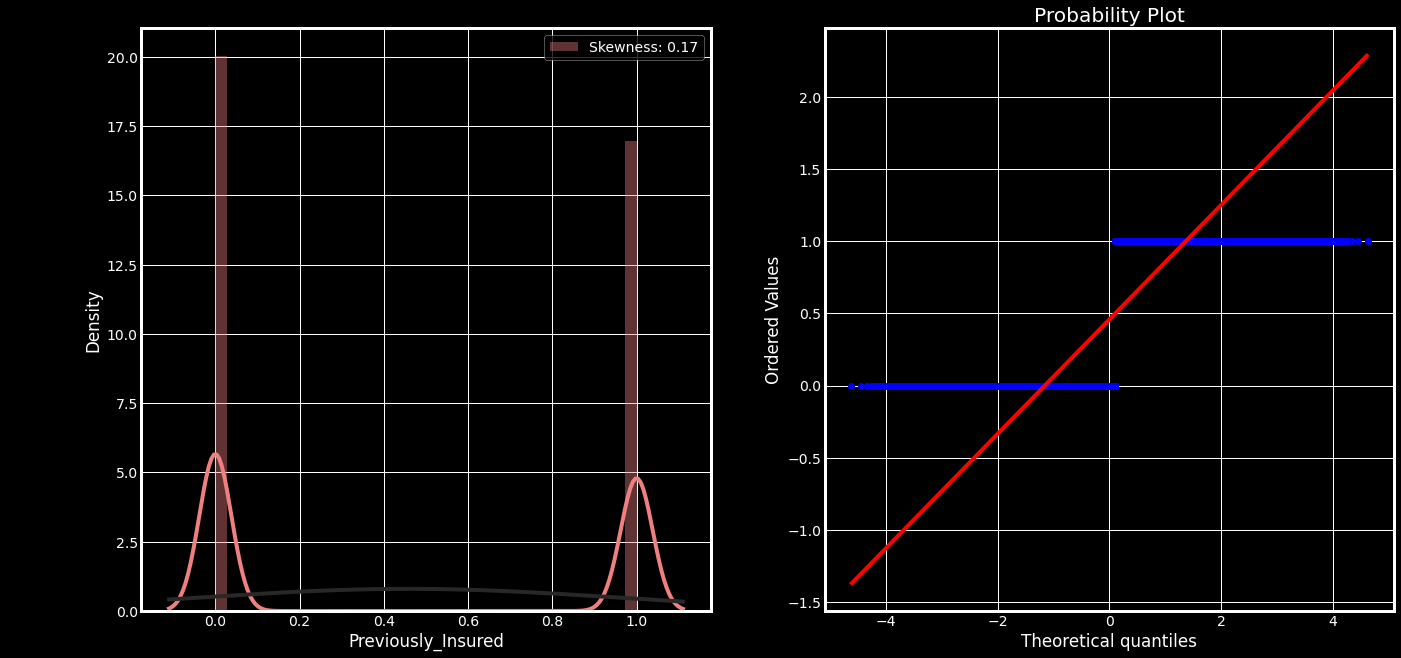

Skewness After Transformation for Previously_Insured:  0.16774711645897533 

Mean before Transformation for Previously_insured : 0.317607051648799, Standard Deviation before Transformation for Previously_insured : 0.34536096061842175 



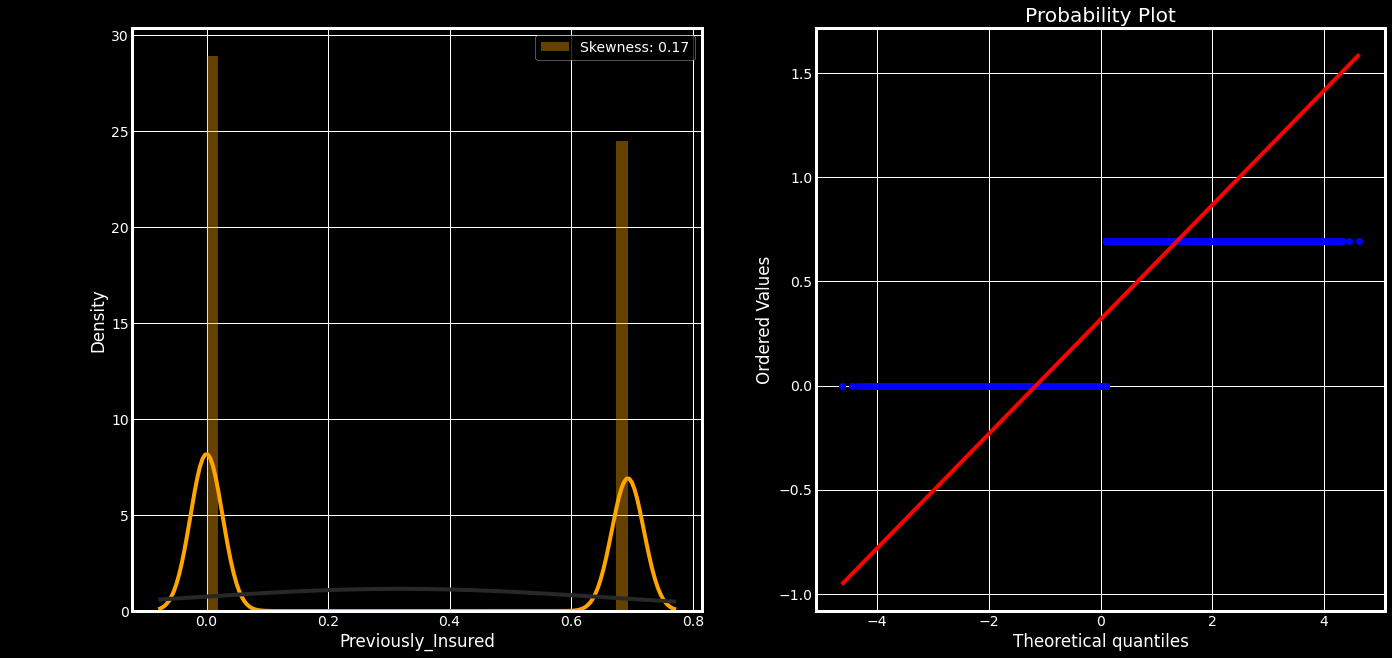

Skewness Before Transformation for Vintage:  0.0030295168899980816 

Mean before Transformation for Vintage : 154.34739667654136, Standard Deviation before Transformation for Vintage : 83.67119385305998 



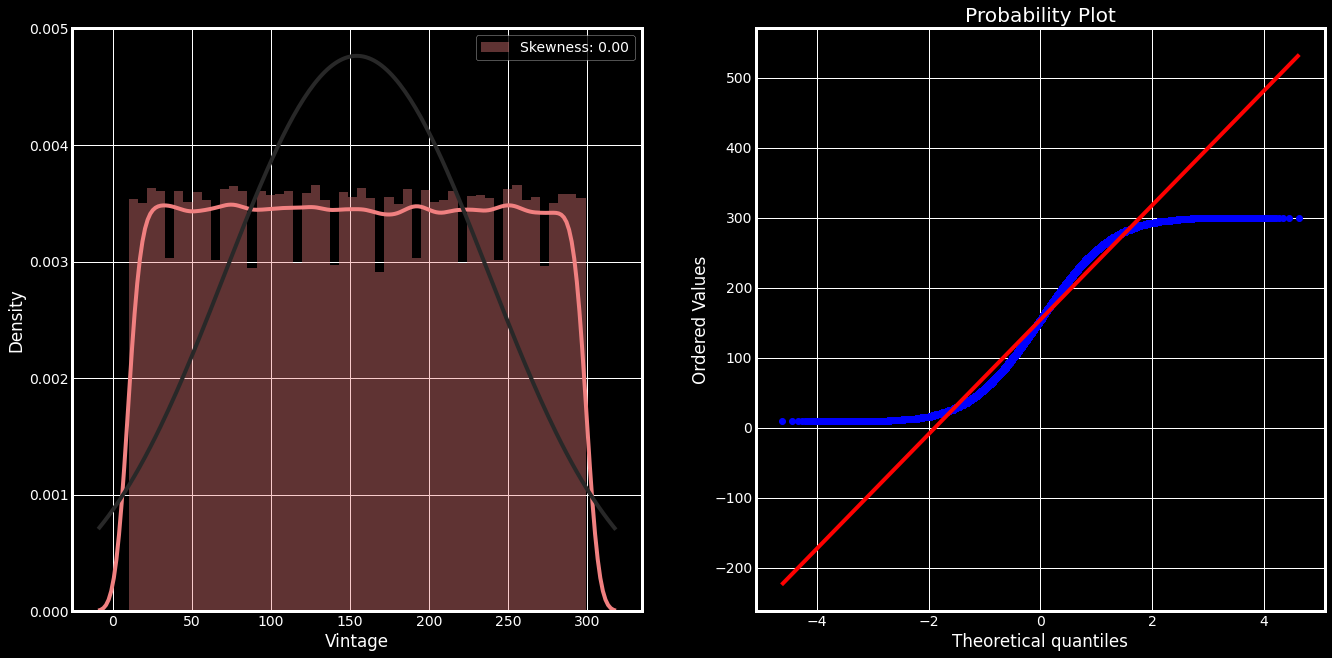

Skewness After Transformation for Vintage:  -1.0919572407177027 

Mean before Transformation for Vintage : 4.826160815290536, Standard Deviation before Transformation for Vintage : 0.7592899874991367 



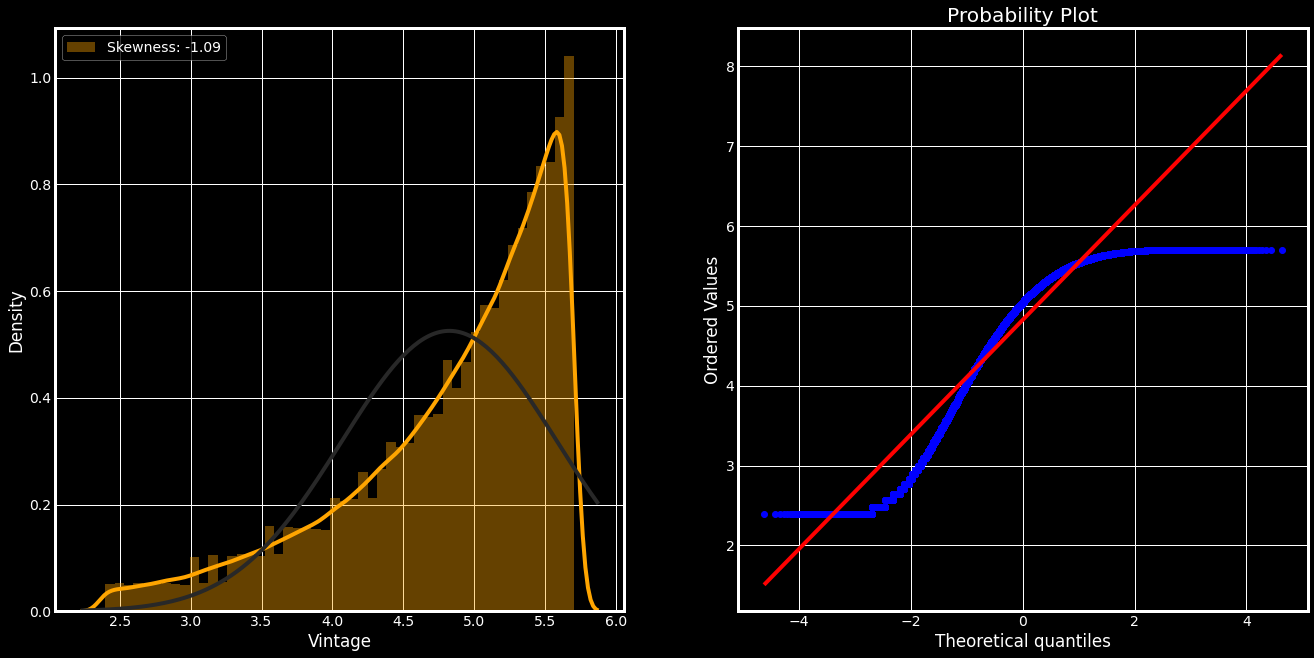

Skewness Before Transformation for Region_Code:  -0.11526641488610123 

Mean before Transformation for Region_code : 26.388807401557035, Standard Deviation before Transformation for Region_code : 13.229870668684972 



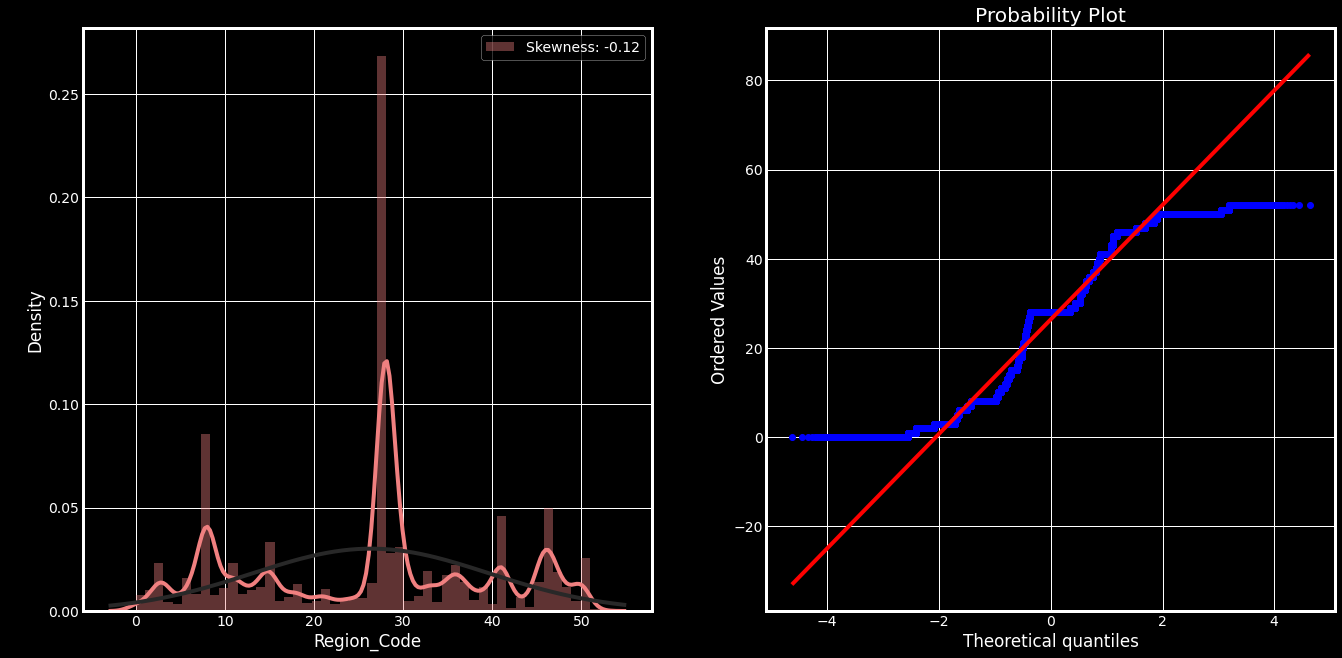

Skewness After Transformation for Region_Code:  -1.4247484580814533 

Mean before Transformation for Region_code : 3.1289350636749504, Standard Deviation before Transformation for Region_code : 0.6990279011014481 



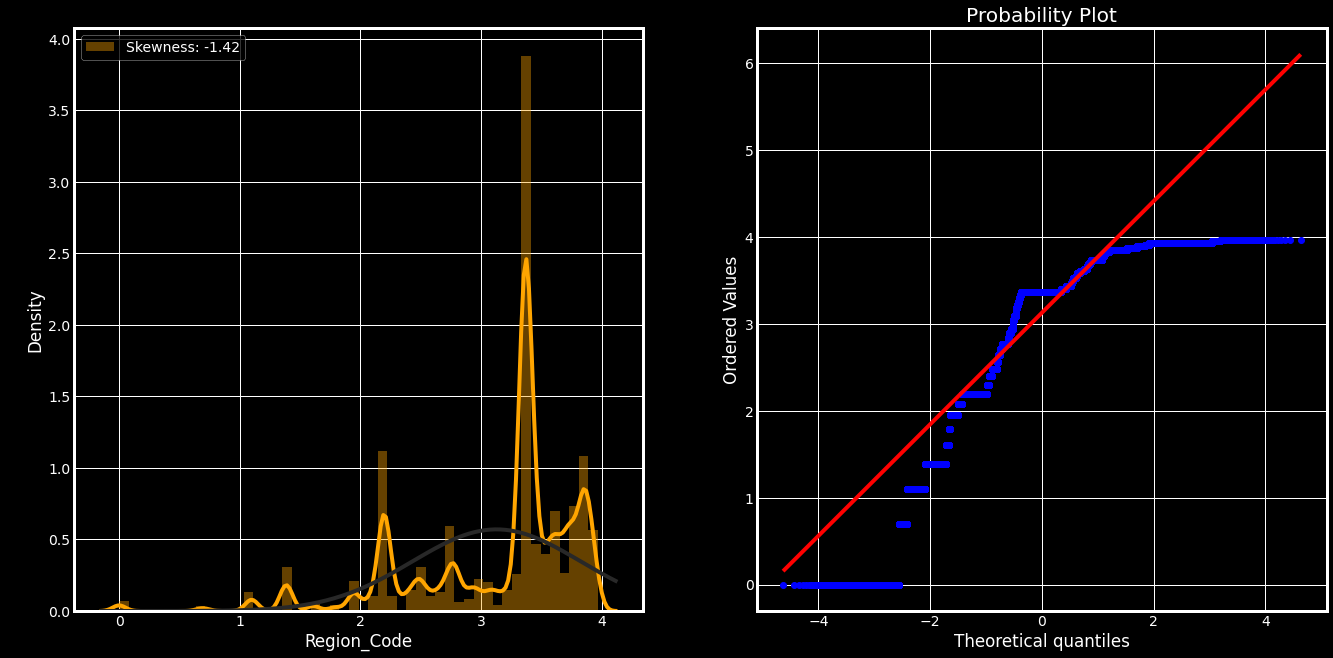

Skewness Before Transformation for Policy_Sales_Channel:  -0.9000081235103394 

Mean before Transformation for Policy_sales_channel : 112.03429465061177, Standard Deviation before Transformation for Policy_sales_channel : 54.203923661303186 



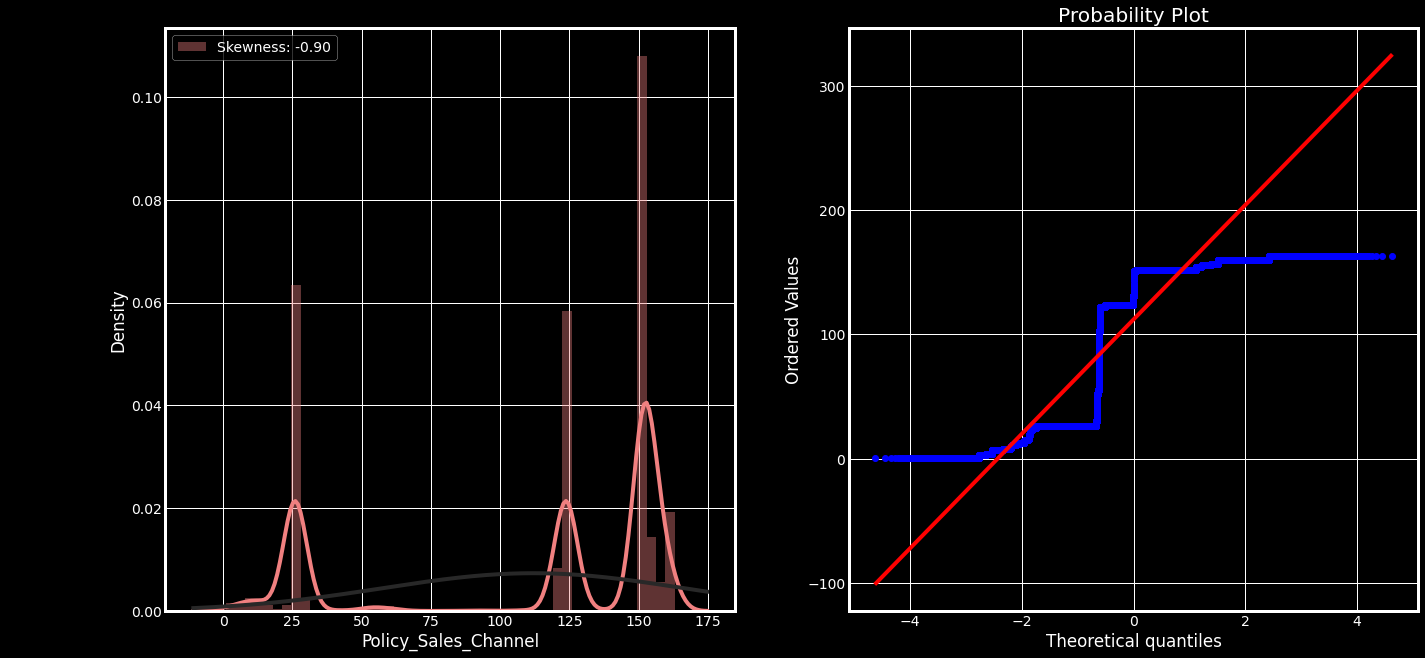

Skewness After Transformation for Policy_Sales_Channel:  -1.3630404530770148 

Mean before Transformation for Policy_sales_channel : 4.495481920852362, Standard Deviation before Transformation for Policy_sales_channel : 0.8203502652966695 



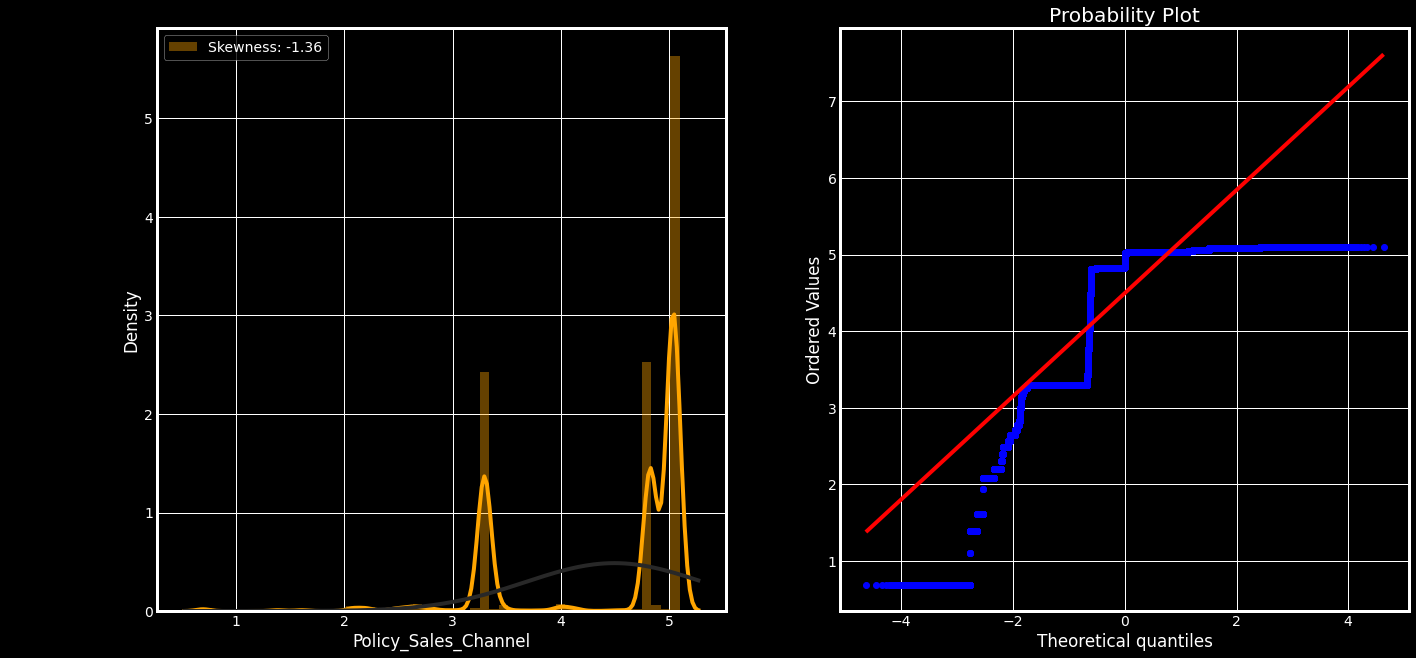

Skewness Before Transformation for Driving_License:  -21.595181529570038 

Mean before Transformation for Driving_license : 0.9978693759528114, Standard Deviation before Transformation for Driving_license : 0.04610948371385373 



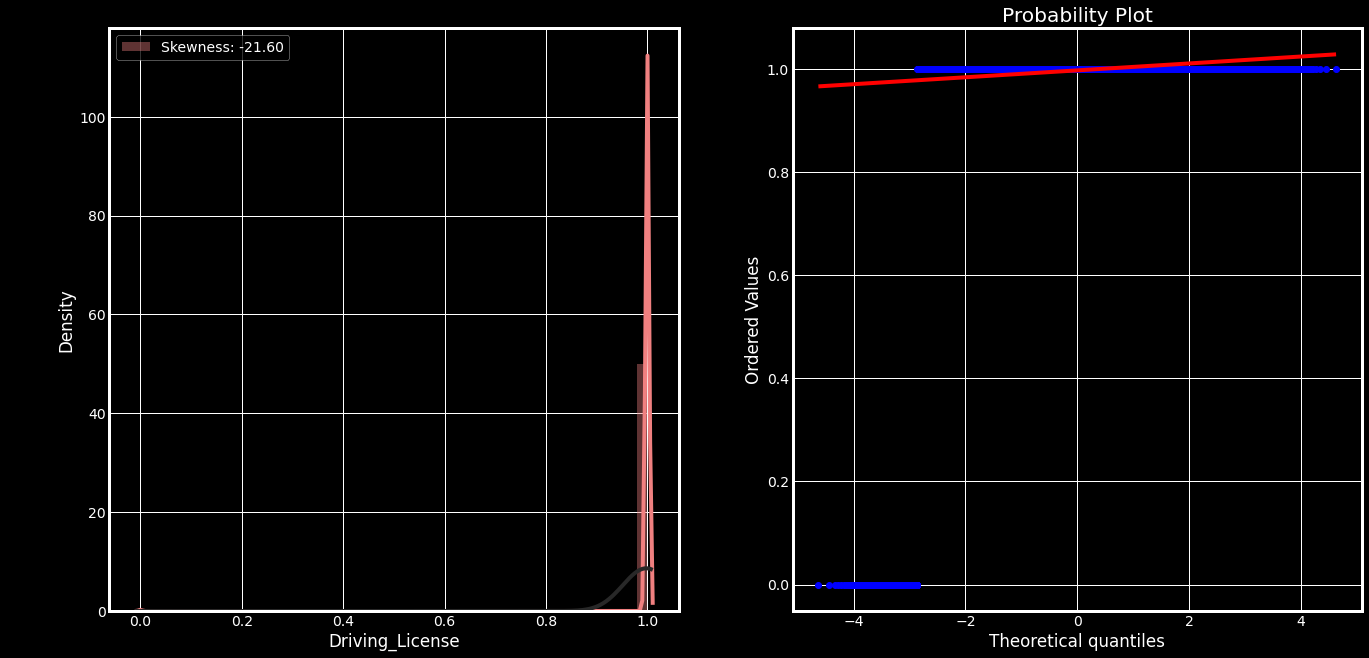

Skewness After Transformation for Driving_License:  -21.595181529570045 

Mean before Transformation for Driving_license : 0.6916703445088033, Standard Deviation before Transformation for Driving_license : 0.03196065863333242 



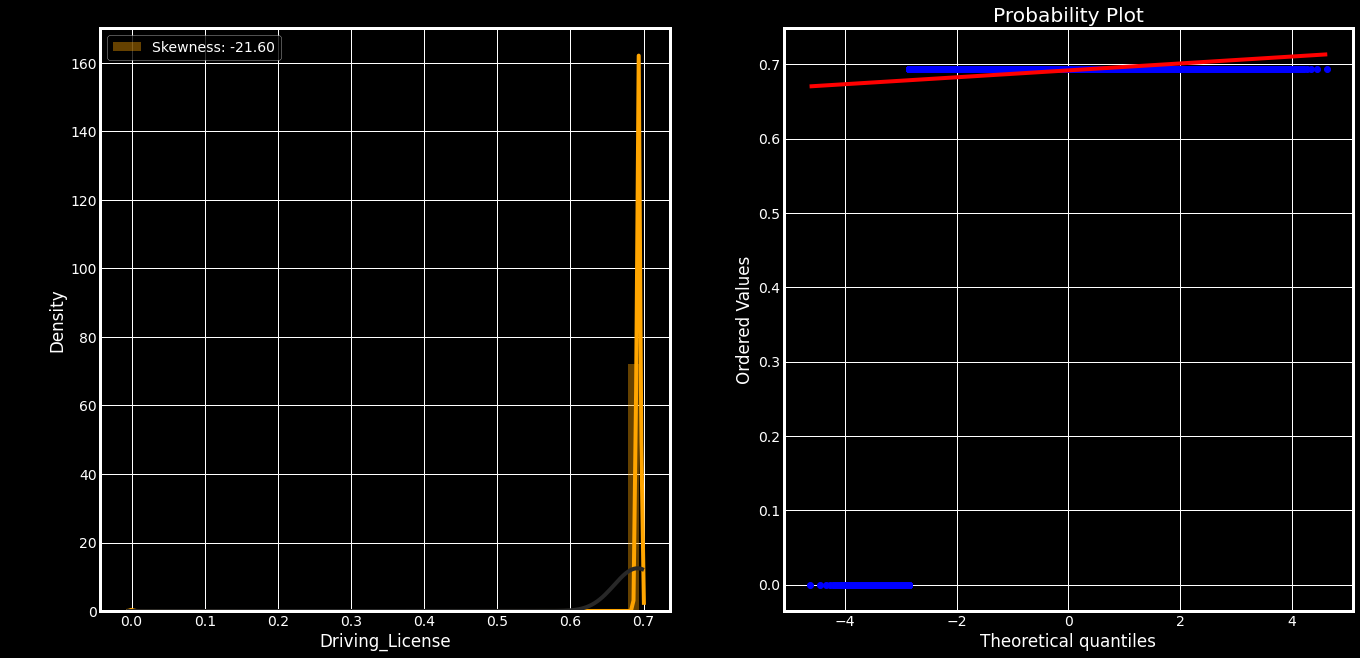

Elapsed Time:  44.06646680831909 seconds



In [22]:
dataset = prep.skewcorrect(dataset,except_columns=['id', 'Response'])



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Preparing Features and labels </h2>
</div>



In [23]:
dataset = dataset.drop('Vehicle_Age', axis =1)
features = dataset.iloc[:, 1:-1]
labels = dataset.iloc[:, -1]

In [24]:
features , labels

(        Gender       Age  Driving_License  Region_Code  Previously_Insured  \
 0         Male  3.806662         0.693147     3.367296            0.000000   
 1         Male  4.343805         0.693147     1.386294            0.000000   
 2         Male  3.871201         0.693147     3.367296            0.000000   
 3         Male  3.091042         0.693147     2.484907            0.693147   
 4       Female  3.401197         0.693147     3.737670            0.693147   
 ...        ...       ...              ...          ...                 ...   
 381104    Male  4.317488         0.693147     3.295837            0.693147   
 381105    Male  3.433987         0.693147     3.637586            0.693147   
 381106    Male  3.091042         0.693147     3.433987            0.693147   
 381107  Female  4.234107         0.693147     2.708050            0.000000   
 381108    Male  3.850148         0.693147     3.401197            0.000000   
 
        Vehicle_Damage  Annual_Premium  Policy_Sal

In [25]:
features.shape, labels.shape

((381109, 9), (381109,))



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Model training</h1>
</div>




In [26]:
accuracy_scores = {}



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Logistic Regression</h2>
</div>





Started Predictor 

Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Applying LDA [*]

LDA Done [ ✓ ]

Training Logistic Regression on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[66699     0]
 [ 9523     0]]


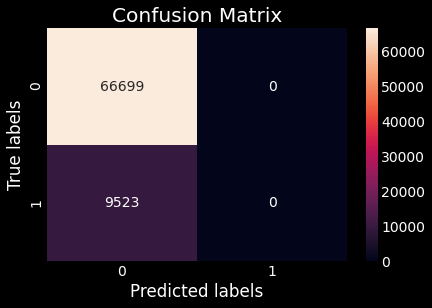

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.8750623179659416
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 87.80 %
Standard Deviation: 0.00 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  2.495143175125122 seconds 



In [27]:
params = {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
classifier_name,accuracy = cls.Classification(predictor = 'lr', params=params, lda = 'y' ,cv_folds = 3).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training K-Nearest Neighnours</h2>
</div>






Started Predictor 

Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Applying LDA [*]

LDA Done [ ✓ ]

Training K-Nearest Neighbours on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[63792  2907]
 [ 8407  1116]]


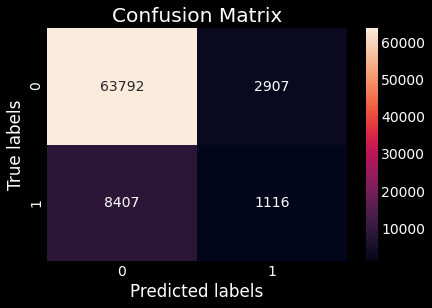

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.8515651649130173
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 85.43 %
Standard Deviation: 0.05 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  18.639999628067017 seconds 



In [28]:
params = {'algorithm': 'kd_tree', 'n_jobs': 1, 'n_neighbors': 5, 'weights': 'uniform'}
classifier_name,accuracy = cls.Classification(predictor = 'knn', 
                                              params= params, lda = 'y' , cv_folds = 3
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Decision Trees</h2>
</div>



Started Predictor 

Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Applying LDA [*]

LDA Done [ ✓ ]

Training Decision Tree Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[65734   965]
 [ 9222   301]]


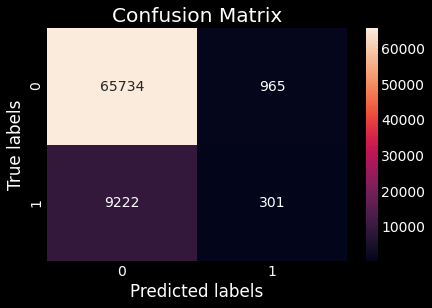

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.8663509223058959
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 86.71 %
Standard Deviation: 0.06 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  7.474893808364868 seconds 



In [29]:
params = {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'splitter': 'best', 'random_state': 42}
classifier_name,accuracy = cls.Classification(predictor = 'dt', 
                                              params=params, lda = 'y' , cv_folds = 3
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Gausian naive Bayes</h2>
</div>



Started Predictor 

Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Applying LDA [*]

LDA Done [ ✓ ]

Training Naive Bayes Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[55656 11043]
 [ 5184  4339]]


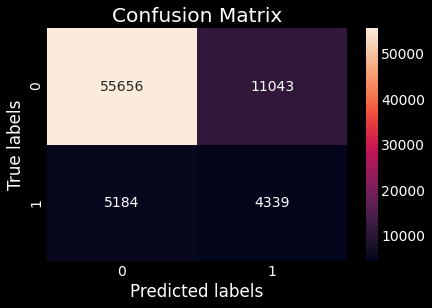

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.7871087087717457
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 78.88 %
Standard Deviation: 0.19 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  1.521033525466919 seconds 



In [30]:
classifier_name,accuracy = cls.Classification(predictor = 'nb', lda = 'y', cv_folds = 3
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Random Forest</h2>
</div>




Started Predictor 

Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Applying LDA [*]

LDA Done [ ✓ ]

Training Random Forest Classifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[59873  6826]
 [ 7199  2324]]


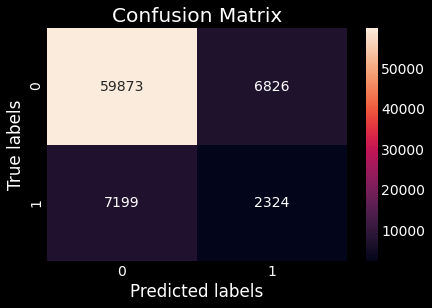

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.8159980058250899
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 81.86 %
Standard Deviation: 0.05 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  407.8673605918884 seconds 



In [31]:
params = {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150,'random_state':0}
classifier_name,accuracy = cls.Classification(predictor = 'rfc', 
                                                params = params, lda = 'y' , cv_folds = 3
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training XGBoost Classifier</h2>
</div>



Started Predictor 

Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Applying LDA [*]

LDA Done [ ✓ ]

Training XGBClassifier on Training Set [*]

Model Training Done [ ✓ ]

Predicting Data [*]

Data Prediction Done [ ✓ ]

Making Confusion Matrix [*]
[[66699     0]
 [ 9523     0]]


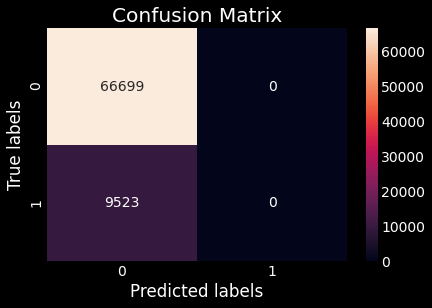

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.8750623179659416
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 87.80 %
Standard Deviation: 0.00 %
K-Fold Cross validation [ ✓ ]

Complete [ ✓ ]

Time Elapsed :  256.3756387233734 seconds 



In [32]:
params = {'learning_rate':0.02, 'n_estimators':600, 'objective':'binary:logistic', 'eval_metric':'logloss', 'nthread':-1}
classifier_name,accuracy = cls.Classification(predictor = 'xgb', 
                                                params = params , lda = 'y', cv_folds = 3
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training ANN</h2>
</div>



Started Predictor 

Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Features and labels are not categorical [ ✓ ]

Checking for Sparse Matrix [*]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Applying LDA [*]

LDA Done [ ✓ ]

Training ANN on Training Set [*]

Epoch 1/100
9757/9757 [==============================] - 16s 2ms/step - loss: 0.2914 - accuracy: 0.8788 - val_loss: 0.2825 - val_accuracy: 0.8765
Epoch 2/100
9757/9757 [==============================] - 15s 1ms/step - loss: 0.2809 - accuracy: 0.8779 - val_loss: 0.2820 - val_accuracy: 0.8765
Epoch 3/100
9757/9757 [==============================] - 15s 2ms/step - loss: 0.2826 - accuracy: 0.8767 - val_loss: 0.2818 - val_accuracy: 0.8765
Epoch 4/100
9757/9757 [==============================] - 14s 1ms/step - loss: 0.2803 - accuracy: 0.8782 - val_loss: 0.2824 - val_accur

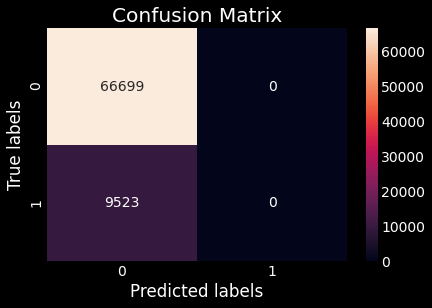

Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.8750623179659416
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Epoch 1/100
8131/8131 [==============================] - 11s 1ms/step - loss: 0.2990 - accuracy: 0.8774
Epoch 2/100
8131/8131 [==============================] - 10s 1ms/step - loss: 0.2793 - accuracy: 0.8790
Epoch 3/100
8131/8131 [==============================] - 11s 1ms/step - loss: 0.2795 - accuracy: 0.8789
Epoch 4/100
8131/8131 [==============================] - 10s 1ms/step - loss: 0.2800 - accuracy: 0.8780
Epoch 5/100
8131/8131 [==============================] - 10s 1ms/step - loss: 0.2784 - accuracy: 0.8789
Epoch 6/100
8131/8131 [==============================] - 10s 1ms/step - loss: 0.2776 - accuracy: 0.8795
Epoch 7/100
8131/8131 [==============================] - 11s 1ms/step - loss: 0.2782 - accuracy: 0.8793
Epoch 8/100
8131/8131 [==============================] - 10s 1ms/step - loss: 0.2791 - accura

In [33]:
classifier_name,accuracy = cls.Classification(predictor = 'ann', 
                                             batch_size = 25, input_units = 15, epochs = 100 ,lda = 'y', cv_folds = 3
                                             ).predict(features, labels)
accuracy_scores[classifier_name] = accuracy



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Finding which model performed better</h1>
</div>


In [34]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  Logistic Regression with an accuracy of  87.80


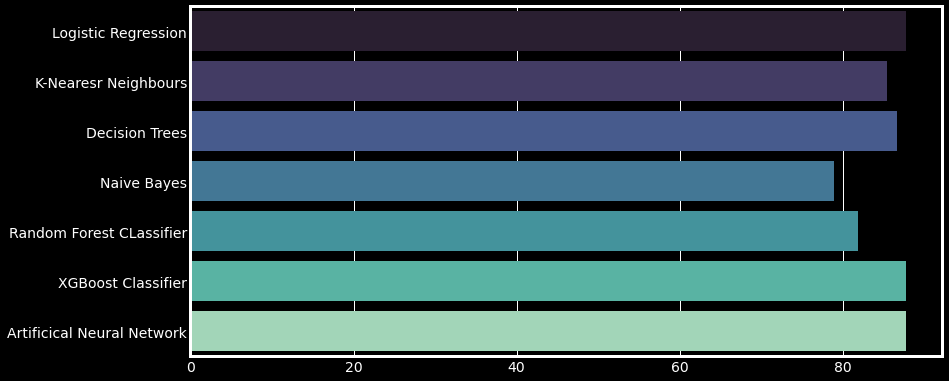

In [35]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = list(accuracy_scores.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='mako');



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Summary</h1>
<h2 style="text-align:center;">Artificial Neural Network performed best.</h2>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:green;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Please give feedback by commenting below and If you liked my work please consider upvoting</h1>
</div>
